In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.5 MB/s 
     |████████████████████████████████| 9.9 MB 34.4 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
import warnings
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
warnings.filterwarnings(action='ignore')

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import ndiffs
import pmdarima as pm

## Step 1. 데이터 구축

In [6]:
df4 = pd.read_excel("/content/drive/MyDrive/CJ네트웍스 Remote Internship/[PBL]DataSet/분기매출데이터3.xlsx")

In [7]:
df3 = df4[['상권_코드_명', '서비스_업종_코드_명', 'Unnamed: 5', '분기당_매출_금액']]
df3 = df3.rename(columns={'Unnamed: 5':'연분기'})
df3['날짜'] = df3['연분기']

In [8]:
df3.loc[df3['연분기'] == "20171Q", '날짜'] = "2017-01-01"
df3.loc[df3['연분기'] == "20172Q", '날짜'] = "2017-04-01"
df3.loc[df3['연분기'] == "20173Q", '날짜'] = "2017-07-01"
df3.loc[df3['연분기'] == "20174Q", '날짜'] = "2017-10-01"

df3.loc[df3['연분기'] == "20181Q", '날짜'] = "2018-01-01"
df3.loc[df3['연분기'] == "20182Q", '날짜'] = "2018-04-01"
df3.loc[df3['연분기'] == "20183Q", '날짜'] = "2018-07-01"
df3.loc[df3['연분기'] == "20184Q", '날짜'] = "2018-10-01"

df3.loc[df3['연분기'] == "20191Q", '날짜'] = "2019-01-01"
df3.loc[df3['연분기'] == "20192Q", '날짜'] = "2019-04-01"
df3.loc[df3['연분기'] == "20193Q", '날짜'] = "2019-07-01"
df3.loc[df3['연분기'] == "20194Q", '날짜'] = "2019-10-01"

df3.loc[df3['연분기'] == "20201Q", '날짜'] = "2020-01-01"
df3.loc[df3['연분기'] == "20202Q", '날짜'] = "2020-04-01"
df3.loc[df3['연분기'] == "20203Q", '날짜'] = "2020-07-01"
df3.loc[df3['연분기'] == "20204Q", '날짜'] = "2020-10-01"

df3.loc[df3['연분기'] == "20211Q", '날짜'] = "2021-01-01"
df3.loc[df3['연분기'] == "20212Q", '날짜'] = "2021-04-01"
df3.loc[df3['연분기'] == "20213Q", '날짜'] = "2021-07-01"
df3.loc[df3['연분기'] == "20214Q", '날짜'] = "2021-10-01"

In [9]:
area = pd.unique(df3['상권_코드_명'])
c = list(pd.unique(df3['서비스_업종_코드_명']))
df3 = df3.set_index(['상권_코드_명', '서비스_업종_코드_명'], drop=False)

In [10]:
spot = list(pd.unique(df3['상권_코드_명']))
service = list(pd.unique(df3['서비스_업종_코드_명']))

In [11]:
spot

['가산디지털단지',
 '강남역',
 '노량진역(노량진)',
 '노원역',
 '동대문패션타운 관광특구',
 '명동 남대문 북창동 다동 무교동 관광특구',
 '역삼역',
 '을지로3가역',
 '잠실역',
 '종로·청계 관광특구']

In [12]:
service

['운동/경기용품', '치킨전문점', '커피-음료', '편의점', '호프-간이주점', '화장품']

In [13]:
df3 = df3[['분기당_매출_금액', '날짜']]
data = df3

In [14]:
data

분기당_매출_금액          날짜
상권_코드_명    서비스_업종_코드_명                         
가산디지털단지    운동/경기용품      15709118906  2017-01-01
           치킨전문점         1735080057  2017-01-01
           커피-음료         9930693879  2017-01-01
           편의점          16868405691  2017-01-01
           호프-간이주점       4855720704  2017-01-01
...                             ...         ...
종로·청계 관광특구 치킨전문점         1864777240  2021-10-01
           커피-음료         5582224702  2021-10-01
           편의점           5018884428  2021-10-01
           호프-간이주점       5061517346  2021-10-01
           화장품            501796528  2021-10-01

[1156 rows x 2 columns]

## step2. 시계열 자료 시각화

In [15]:
# 특정상권과 업종의 데이터만 가져오기
ts_data = data.loc['을지로3가역', '커피-음료']

ts_data['날짜'] = pd.to_datetime(ts_data['날짜'])
ts_data = ts_data.set_index(['날짜'])
ts_data

,분기당_매출_금액
날짜,
2017-01-01,2794849572
2017-04-01,3060330797
2017-07-01,3485814684
2017-10-01,3155981018
2018-01-01,3323085918
2018-04-01,3816171562
2018-07-01,3945060180
2018-10-01,4018114409
2019-01-01,4141721215


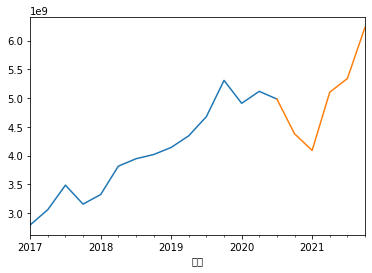

In [16]:
y_train = ts_data['분기당_매출_금액'][:int(0.7*len(ts_data))+1]
y_test = ts_data['분기당_매출_금액'][int(0.7*len(ts_data)):]
y_train.plot()
y_test.plot()

In [17]:
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(adf_diffs, kpss_diffs)

print(f"추정된 차수 d = {n_diffs}")

추정된 차수 d = 1


## step 3. ARIMA 모형 적합

In [18]:
model = pm.auto_arima(y = y_train,
                      d = n_diffs,
                      start_p = 0,
                      max_p = 3,
                      start_q = 0,
                      max_q = 3,
                      m = 1,
                      seasonal = False,
                      stepwise = True,
                      trace = True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=588.296, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=590.629, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=590.665, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=590.140, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=592.093, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.369 seconds


## step 4. 잔차 검정

In [19]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -292.148
Date:                Mon, 21 Nov 2022   AIC                            588.296
Time:                        06:26:42   BIC                            589.574
Sample:                    01-01-2017   HQIC                           588.178
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.563e+08   7.47e+07      2.092      0.036    9.89e+06    3.03e+08
sigma2      7.816e+16      0.061   1.28e+18      0.000    7.82e+16    7.82e+16
Ljung-Box (L1) (Q):                   1.49   Jarque-

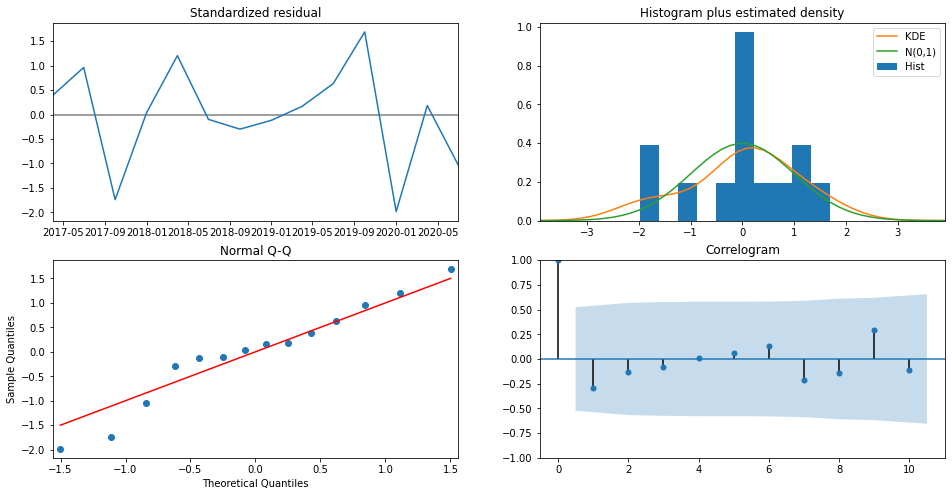

In [20]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

- Standardized residual은 잔차를 시계열로 그린 그래프
  - white noise 임에 따라, 시계열의 평균이 0을 중심으로 무작위하게 나타나는 것을 관찰 할 수 있다
- Correlogram은 잔차에 대한 ACF 를 시각화 한 그래프
  - ACF가 시점 1부터는 어느 정도 허용 범위 안에 위치하여 자기상관이 없음을 알 수 있다
- 다만, Historam plus estimated density와 잔차의 분포가 정규분포를 따르지 않는 점, Normal Q-Q 그림에서 기준선에서 다소 떨어진 지점의 scatter가 찍히고 있다.
- 결과적으로, 분기별 매출에 대한 시계열 모형 적합은 ARIMA(0,2,0)이 적합한 모델로 나오나, 남은 잔차는 white noise이지만 정규성은 따르지 않는다는 사실을 확인할 수 있었다

## step 5. 모형 refresh 및 예측

In [21]:
y_pred = model.predict(n_periods=len(y_test))
y_pred = pd.DataFrame(y_pred, index=y_test.index, columns=['Prediction'])
y_pred

,Prediction
날짜,
2020-07-01,NaN
2020-10-01,5.139932e+09
2021-01-01,5.296271e+09
2021-04-01,5.452610e+09
2021-07-01,5.608949e+09
2021-10-01,5.765287e+09


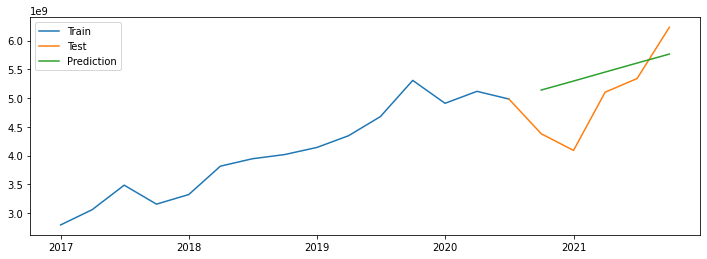

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(12,4))
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

In [23]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1 # 한 스텝씩!
        , return_conf_int=True)              # 신뢰구간 출력
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0]
    )

In [24]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])

    ## 모형 업데이트 !!
    model.update(new_ob)

In [25]:
pd.DataFrame({"test": y_test, "pred": y_pred})

,test,pred
날짜,,
2020-07-01,4983593286,5.139932e+09
2020-10-01,4379988870,5.139932e+09
2021-01-01,4090067810,4.536328e+09
2021-04-01,5102400114,4.246407e+09
2021-07-01,5339955133,5.258739e+09
2021-10-01,6231825578,5.496294e+09


In [26]:
y_test

날짜
2020-07-01    4983593286
2020-10-01    4379988870
2021-01-01    4090067810
2021-04-01    5102400114
2021-07-01    5339955133
2021-10-01    6231825578
Name: 분기당_매출_금액, dtype: int64

In [27]:
y_pred

[5139932122.714286,
 5139932122.714286,
 4536327706.714286,
 4246406646.714286,
 5258738950.714286,
 5496293969.714286]

In [28]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   21
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -427.669
Date:                Mon, 21 Nov 2022   AIC                            859.338
Time:                        06:26:43   BIC                            861.330
Sample:                             0   HQIC                           859.727
                                 - 21                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.563e+08   4.39e+07      3.564      0.000    7.04e+07    2.42e+08
sigma2      7.816e+16      0.029   2.68e+18      0.000    7.82e+16    7.82e+16
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [29]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = go.Figure([
    # 훈련 데이터-------------------------------------------------------
    go.Scatter(x = y_train.index, y = y_train, name = "Train", mode = 'lines'
              ,line=dict(color = 'royalblue'))
    # 테스트 데이터------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_test, name = "Test", mode = 'lines'
                ,line = dict(color = 'rgba(0,0,30,0.5)'))
    # 예측값-----------------------------------------------------------
    , go.Scatter(x = y_test.index, y = y_pred, name = "Prediction", mode = 'lines'
                     ,line = dict(color = 'red', dash = 'dot', width=3))
    
    # 신뢰 구간---------------------------------------------------------
    , go.Scatter(x = y_test.index.tolist() + y_test.index[::-1].tolist() 
                ,y = pred_upper + pred_lower[::-1] ## 상위 신뢰 구간 -> 하위 신뢰 구간 역순으로
                ,fill='toself'
                ,fillcolor='rgba(0,0,30,0.1)'
                ,line=dict(color='rgba(0,0,0,0)')
                ,hoverinfo="skip"
                ,showlegend=False)
])

fig.update_layout(height=400, width=1000, title_text="ARIMA 모형 적용 결과")
fig.show()

In [30]:
def MAPE(y_test, y_pred):
	return np.mean(np.abs((y_test - y_pred) / y_test)) * 100 
    
print(f"MAPE: {MAPE(y_test, y_pred):.3f}")

MAPE: 10.250


In [31]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/auto_arima를 활용한 ARIMA적합 및 예측.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/auto_arima를 활용한 ARIMA적합 및 예측.ipynb to html
[NbConvertApp] Writing 318445 bytes to /content/drive/MyDrive/Colab Notebooks/auto_arima를 활용한 ARIMA적합 및 예측.html
